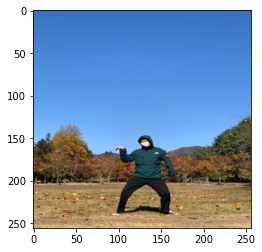

In [2]:
#필요 Library import
import tensorflow as tf
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

#이미지를 256,256 size로 load 합니다.
img = Image.open('sample_data\Image1.jpg').resize((256,256))
plt.imshow(img)

In [3]:
#img 를 rgb 값을 활용하여 숫자 배열로 변형합니다.
#불러들인 배열은 255 로 나누어 스케일을 조정해줍니다.
img_arr = np.array(img)/255.
img_arr = img_arr.reshape((1,)+img_arr.shape)

# 이미지가 R,G,B 3개의 채널을 가지고 있음으로 (h,w,3) 의 배열이 반환됩니다.
print(img_arr.shape) 
print(img_arr[:10,:10,0])

(1, 256, 256, 3)
[[[0.21568627 0.43137255 0.74509804]
  [0.21568627 0.43137255 0.74509804]
  [0.21960784 0.44313725 0.75294118]
  [0.21960784 0.45098039 0.75686275]
  [0.22352941 0.44705882 0.75686275]
  [0.22352941 0.44705882 0.75686275]
  [0.22745098 0.45098039 0.76078431]
  [0.23137255 0.45490196 0.76470588]
  [0.23529412 0.45882353 0.76862745]
  [0.23529412 0.45882353 0.76862745]]]


(254, 254, 3)

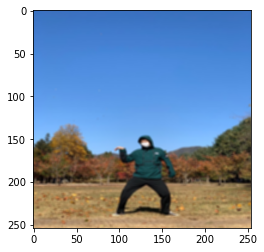

In [4]:
#가중치 1/9 를 포함하는 3x3 kernel을 만듭니다.
kernel = np.zeros((3,3,1,1),dtype=np.float32)
kernel[:,:,:,0] = 1/9


#불러온 이미지를 kernel을 포함한 합성곱 층을 통과 시킵니다.
#R,G,B 새개의 채널을 각각 따로 CNN 층에 통과시킵니다.
R = tf.nn.conv2d(img_arr[:,:,:,0:1],kernel, strides = (1,1), padding = 'VALID')
G = tf.nn.conv2d(img_arr[:,:,:,1:2],kernel, strides = (1,1), padding = 'VALID')
B = tf.nn.conv2d(img_arr[:,:,:,2:3],kernel, strides = (1,1), padding = 'VALID')

#주변의 값이 1/9씩 더해져 처음사진보다 흐릿한 사진이 완성됩니다.
new_img = np.concatenate([R,G,B],axis=3)[0] * 255
plt.imshow(new_img.astype(np.uint8))

#padding을 해주지 않아 원본 이미지의 크기가 줄어듭니다.
new_img.shape

(256, 256, 3)

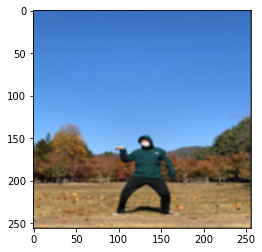

In [5]:
#불러온 이미지를 padding 을 포함해 통과시킵니다.
R = tf.nn.conv2d(img_arr[:,:,:,0:1],kernel, strides = (1,1), padding = 'SAME')
G = tf.nn.conv2d(img_arr[:,:,:,1:2],kernel, strides = (1,1), padding = 'SAME')
B = tf.nn.conv2d(img_arr[:,:,:,2:3],kernel, strides = (1,1), padding = 'SAME')

#주변의 값이 1/9씩 더해져 처음사진보다 흐릿한 사진이 완성됩니다.
new_img = np.concatenate([R,G,B],axis=3)[0] * 255
plt.imshow(new_img.astype(np.uint8))

#padding을 해주어 원본 이미지 크기가 유지됩니다.
new_img.shape

In [6]:
conv = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1),
                             padding = 'same', activation = 'relu')